In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style='whitegrid')

In [2]:
data_df = pd.read_excel('Biostats Project.xlsx')

In [3]:
data_df

,Countries,Confirmed Cases,Deaths,GDP per capita in USD,GHS Index,Gender Ratio Males per 100 Females,Literacy Rate in %
0,USA,113690,3433,47099.98,83.5,97.58,NaN
1,Mexico,70715,1316,8002.97,57.6,95.81,93.44
2,Brazil,58178,2135,8597.92,59.7,97.34,90.30
3,India,33783,2024,1101.96,46.5,108.45,74.04
4,Russia,25339,604,8562.81,44.3,86.49,99.68


In [4]:
data_df['Literacy Rate in %'][0]= 99.00

<ipython-input-4-380267b37de9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['Literacy Rate in %'][0]= 99.00


In [5]:
data_df['Literacy Rate in %'][0]

99.0

In [6]:
data_df['Fatality Rate'] = data_df['Deaths']/data_df['Confirmed Cases']

In [7]:
data_df

,Countries,Confirmed Cases,Deaths,GDP per capita in USD,GHS Index,Gender Ratio Males per 100 Females,Literacy Rate in %,Fatality Rate
0,USA,113690,3433,47099.98,83.5,97.58,99.00,0.030196
1,Mexico,70715,1316,8002.97,57.6,95.81,93.44,0.018610
2,Brazil,58178,2135,8597.92,59.7,97.34,90.30,0.036698
3,India,33783,2024,1101.96,46.5,108.45,74.04,0.059912
4,Russia,25339,604,8562.81,44.3,86.49,99.68,0.023837


In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
data_df.columns

Index(['Countries', 'Confirmed Cases', 'Deaths', 'GDP per capita in USD',
       'GHS Index', 'Gender Ratio Males per 100 Females', 'Literacy Rate in %',
       'Fatality Rate'],
      dtype='object')

In [24]:
X = data_df[['GDP per capita in USD','GHS Index', 'Gender Ratio Males per 100 Females', 'Literacy Rate in %' ]]
y = data_df['Fatality Rate']

In [25]:
LR_Scaler = MinMaxScaler()

In [26]:
LR_Scaler.fit(X)

MinMaxScaler()

In [27]:
X = LR_Scaler.transform(X)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()

In [30]:
model.fit(X, y)

LinearRegression()

In [31]:
print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

Coefficients: 
 [ 0.04531553  0.05462851 -0.1824599  -0.22281918]
Intercept: 
 0.23930580167242413


In [32]:
print('The equation of the line is: \n', 'Y = 0.23930580167242413 + 0.04531553*X1 + 0.05462851*X2 - 0.1824599*X3 - 0.22281918*X4', '\n')
print('\n', 'X1: GDP per capita in USD', '\n', 'X2: GHS Index','\n', 'X3: Gender Ratio Males per 100 Females', '\n', 'X4: Literacy Rate in %')

The equation of the line is: 
 Y = 0.23930580167242413 + 0.04531553*X1 + 0.05462851*X2 - 0.1824599*X3 - 0.22281918*X4 


 X1: GDP per capita in USD 
 X2: GHS Index 
 X3: Gender Ratio Males per 100 Females 
 X4: Literacy Rate in %


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [34]:
scaler.fit(X_train)

MinMaxScaler()

In [35]:
X_train = scaler.transform(X_train)

In [36]:
X_train

array([[0.16219937, 0.        , 0.        , 1.        ],
       [0.16296267, 0.39285714, 0.49408015, 0.63416537],
       [1.        , 1.        , 0.50500911, 0.97347894],
       [0.        , 0.05612245, 1.        , 0.        ]])

In [37]:
LRegression = LinearRegression()

In [38]:
LRegression.fit(X_train, y_train)

LinearRegression()

In [39]:
X_test = scaler.transform(X_test)

In [40]:
predicted = LRegression.predict(X_test)

In [42]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [43]:
MAE = mean_absolute_error(y_test, predicted)
MSE = mean_squared_error(y_test, predicted)
RMSE = (mean_squared_error(y_test, predicted))**0.5

In [54]:
print('\n', 'The Mean Absolute Error is' , MAE, '\n','The Mean Squared Error is', MSE,  '\n','The Root Mean Squared Error is', RMSE)


 The Mean Absolute Error is 0.014819831365913545 
 The Mean Squared Error is 0.00021962740171411492 
 The Root Mean Squared Error is 0.014819831365913545


In [45]:
print('Coefficients: \n', LRegression.coef_)

Coefficients: 
 [ 0.00567074 -0.00807518  0.0181623  -0.01928571]


In [46]:
print('Intercept: \n', LRegression.intercept_)

Intercept: 
 0.04220269350682826


In [47]:
print('The equation of the line is: \n', 'Y = 0.04220269350682826 + 0.00567074*X1 -0.00807518*X2 + 0.0181623*X3 - 0.01928571*X4', '\n')
print('\n', 'X1: GDP per capita in USD', '\n', 'X2: GHS Index','\n', 'X3: Gender Ratio Males per 100 Females', '\n', 'X4: Literacy Rate in %')

The equation of the line is: 
 Y = 0.04220269350682826 + 0.00567074*X1 -0.00807518*X2 + 0.0181623*X3 - 0.01928571*X4 


 X1: GDP per capita in USD 
 X2: GHS Index 
 X3: Gender Ratio Males per 100 Females 
 X4: Literacy Rate in %


0.045315527855555426


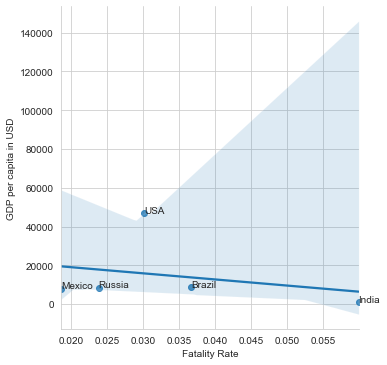

In [48]:
print(model.coef_[0])
annotations=['USA', 'Mexico', 'Brazil', 'India', 'Russia']
sns.lmplot(data = data_df, x='Fatality Rate', y = 'GDP per capita in USD')
for i in range(5):
    plt.text(x=data_df['Fatality Rate'][i], y=data_df['GDP per capita in USD'][i], s=annotations[i])

0.054628505264253814


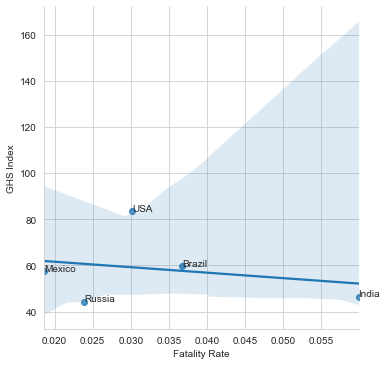

In [49]:
print(model.coef_[1])
sns.lmplot(data = data_df, x='Fatality Rate', y = 'GHS Index')
for i in range(5):
    plt.text(x=data_df['Fatality Rate'][i], y=data_df['GHS Index'][i], s=annotations[i])

-0.18245989721842165


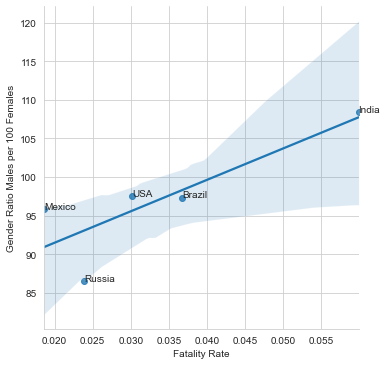

In [50]:
print(model.coef_[2])
sns.lmplot(data = data_df, x='Fatality Rate', y = 'Gender Ratio Males per 100 Females')
for i in range(5):
    plt.text(x=data_df['Fatality Rate'][i], y=data_df['Gender Ratio Males per 100 Females'][i], s=annotations[i])

-0.22281917852123703


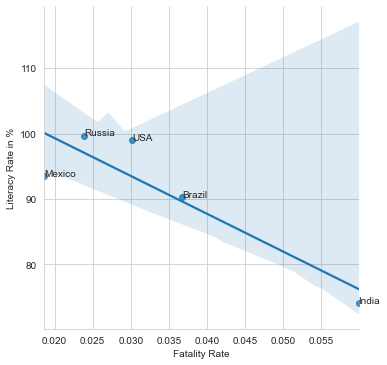

In [51]:
print(model.coef_[3])
sns.lmplot(data = data_df, x='Fatality Rate', y = 'Literacy Rate in %')
for i in range(5):
    plt.text(x=data_df['Fatality Rate'][i], y=data_df['Literacy Rate in %'][i], s=annotations[i])